<span style="display:block; font-size:2.5rem; color:yellow;">Car Resale Price - Random Forest Regressor<span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine                     6019 non-null   float64
 1   Fuel_Type_Diesel           6019 non-null   bool   
 2   Fuel_Type_Electric         6019 non-null   bool   
 3   Fuel_Type_LPG              6019 non-null   bool   
 4   Fuel_Type_Petrol           6019 non-null   bool   
 5   Kilometers_Driven          6019 non-null   int64  
 6   Owner_Type_Fourth & Above  6019 non-null   bool   
 7   Owner_Type_Second          6019 non-null   bool   
 8   Owner_Type_Third           6019 non-null   bool   
 9   Power                      6019 non-null   float64
 10  Price                      6019 non-null   float64
 11  Region_North               6019 non-null   bool   
 12  Region_South               6019 non-null   bool   
 13  Region_West                6019 non-null   bool 

In [4]:
data.describe()

,Engine,Kilometers_Driven,Power,Price,Seats,Year,car_age,mileage_no,mileage_unit_km/kg,mileage_unit_kmpl,car_make_encoded,car_model_encoded
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.0,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,1612.267736,56106.896661,110.733205,7.708463,5.0,2013.374149,11.625851,18.334845,0.010965,0.989035,15.332281,108.485961
std,567.841277,30040.626708,46.891505,5.769853,0.0,3.213540,3.213540,4.127370,0.104148,0.104148,8.052311,65.515028
min,72.000000,171.000000,34.200000,0.440000,5.0,2003.500000,6.000000,6.850000,0.000000,0.000000,0.000000,0.000000
25%,1198.000000,34000.000000,75.000000,3.500000,5.0,2011.000000,9.000000,15.400000,0.000000,1.000000,9.000000,51.000000
50%,1493.000000,53000.000000,93.700000,5.640000,5.0,2014.000000,11.000000,18.330000,0.000000,1.000000,17.000000,99.000000
75%,1969.000000,73000.000000,138.100000,9.950000,5.0,2016.000000,14.000000,21.100000,0.000000,1.000000,19.000000,169.000000
max,3125.500000,131500.000000,232.750000,19.625000,5.0,2019.000000,21.500000,29.650000,1.000000,1.000000,30.000000,211.000000


In [5]:
data.head()

,Engine,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Kilometers_Driven,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Power,...,Year,car_age,car_make,car_model,car_spec,mileage_no,mileage_unit_km/kg,mileage_unit_kmpl,car_make_encoded,car_model_encoded
0,1489.0,True,False,False,False,80000,False,False,True,35.5,...,2003.5,21.5,Ambassador,Classic,Nova Diesel,12.80,0,1,0,46
1,1968.0,True,False,False,False,79271,False,False,False,143.0,...,2014.0,11.0,Audi,A3,35 TDI Attraction,20.38,0,1,1,9
2,1968.0,True,False,False,False,22000,False,True,False,143.0,...,2017.0,8.0,Audi,A3,35 TDI Technology,20.38,0,1,1,9
3,1968.0,True,False,False,False,20003,False,False,False,143.0,...,2016.0,9.0,Audi,A3,35 TDI Premium,20.38,0,1,1,9
4,1968.0,True,False,False,False,39000,False,False,False,143.0,...,2016.0,9.0,Audi,A3,35 TDI Premium Plus,20.38,0,1,1,9


In [31]:
X = data.drop(columns=['Price', "car_make", "car_model", "car_spec", "Year"])
y = data['log_price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best RMSE:', (-grid_search.best_score_)**0.5)

c:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ashu\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Ashu\anaconda3\Lib\site-packages\skl

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 0.06295353175935178


In [34]:
RandomForest = RandomForestRegressor(**grid_search.best_params_)

In [35]:
RandomForest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [36]:
RandomForest_predictions = RandomForest.predict(X_test)
print(RandomForest_predictions)

[1.96824018 1.72359203 1.69450277 ... 1.96334266 2.98323671 2.18993193]


In [37]:
mse = mean_squared_error(y_test, RandomForest_predictions)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, RandomForest_predictions)
print(f"R-Squared: {r2}")
rmse = np.sqrt(mean_squared_error(y_test, RandomForest_predictions))
print(f"RMSE: {rmse:.2f}")

Mean Squared Error: 0.0034491592504362163
R-Squared: 0.9914422496997464
RMSE: 0.06


In [38]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(**grid_search.best_params_))
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = (-scores)**0.5
print("Cross-validated RMSE:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-validated RMSE: [0.13773692 0.07994907 0.08259923 0.0621651  0.08858441 0.07797717
 0.05196583 0.13215499 0.14153164 0.10410811]
Average RMSE: 0.09587724683224226


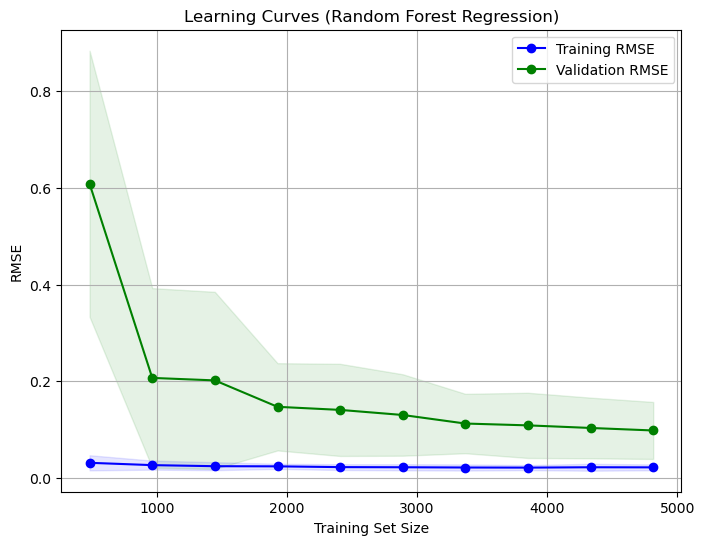

In [39]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(**grid_search.best_params_))

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Calculate means and std deviations of RMSE for train and validation
train_rmse_mean = np.sqrt(-train_scores.mean(axis=1))
train_rmse_std = np.sqrt(train_scores.std(axis=1))
val_rmse_mean = np.sqrt(-val_scores.mean(axis=1))
val_rmse_std = np.sqrt(val_scores.std(axis=1))

# Plot learning curves
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_rmse_mean, 'o-', color='blue', label='Training RMSE')
plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std, train_rmse_mean + train_rmse_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_rmse_mean, 'o-', color='green', label='Validation RMSE')
plt.fill_between(train_sizes, val_rmse_mean - val_rmse_std, val_rmse_mean + val_rmse_std, alpha=0.1, color='green')
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curves (Random Forest Regression)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
data.columns

Index(['Engine', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Kilometers_Driven', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Power', 'Price',
       'Region_North', 'Region_South', 'Region_West', 'Seats',
       'Transmission_Manual', 'Year', 'car_age', 'car_make', 'car_model',
       'car_spec', 'mileage_no', 'mileage_unit_km/kg', 'mileage_unit_kmpl',
       'car_make_encoded', 'car_model_encoded'],
      dtype='object')

In [25]:
data.describe()

,Engine,Kilometers_Driven,Power,Price,Seats,Year,car_age,mileage_no,mileage_unit_km/kg,mileage_unit_kmpl,car_make_encoded,car_model_encoded
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.0,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,1612.267736,56106.896661,110.733205,7.708463,5.0,2013.374149,11.625851,18.334845,0.010965,0.989035,15.332281,108.485961
std,567.841277,30040.626708,46.891505,5.769853,0.0,3.213540,3.213540,4.127370,0.104148,0.104148,8.052311,65.515028
min,72.000000,171.000000,34.200000,0.440000,5.0,2003.500000,6.000000,6.850000,0.000000,0.000000,0.000000,0.000000
25%,1198.000000,34000.000000,75.000000,3.500000,5.0,2011.000000,9.000000,15.400000,0.000000,1.000000,9.000000,51.000000
50%,1493.000000,53000.000000,93.700000,5.640000,5.0,2014.000000,11.000000,18.330000,0.000000,1.000000,17.000000,99.000000
75%,1969.000000,73000.000000,138.100000,9.950000,5.0,2016.000000,14.000000,21.100000,0.000000,1.000000,19.000000,169.000000
max,3125.500000,131500.000000,232.750000,19.625000,5.0,2019.000000,21.500000,29.650000,1.000000,1.000000,30.000000,211.000000


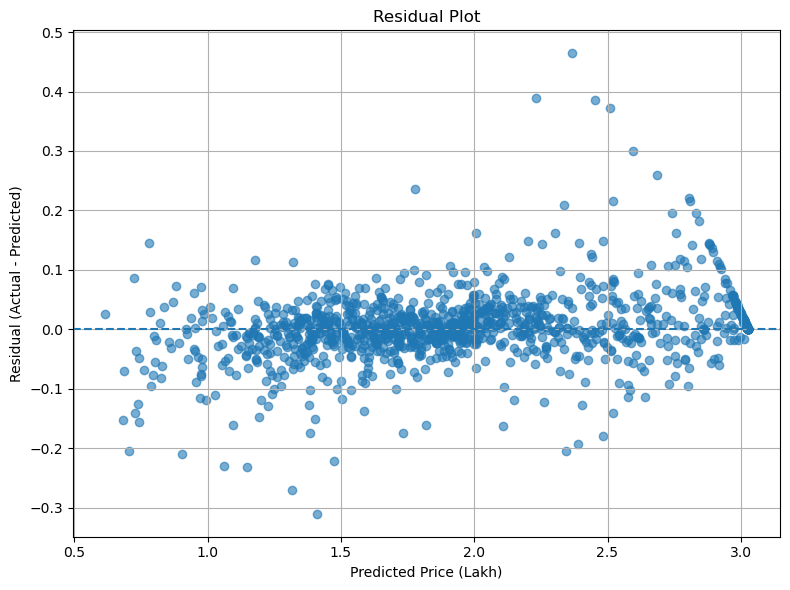

In [40]:
residuals = y_test - RandomForest_predictions

plt.figure(figsize=(8, 6))

plt.scatter(RandomForest_predictions, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')

plt.xlabel("Predicted Price (Lakh)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

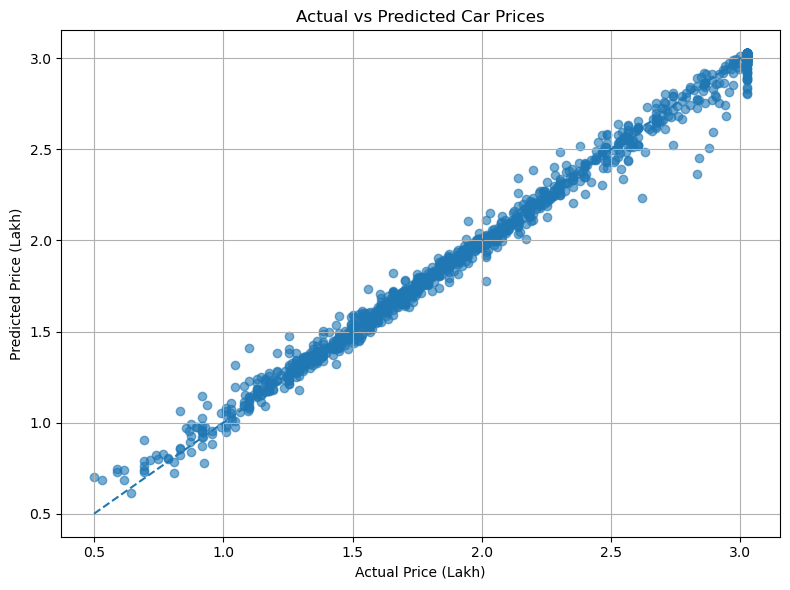

In [41]:

# y_test = original prices (not log)
# y_pred = predicted prices (not log)

plt.figure(figsize=(8, 6))

plt.scatter(y_test, RandomForest_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Price (Lakh)")
plt.ylabel("Predicted Price (Lakh)")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
data['log_price'] = np.log1p(data['Price'])

In [42]:
y_test = np.expm1(y_test)
y_pred = np.expm1(RandomForest_predictions)

In [43]:
indices = np.argsort(y_test)
y_test_sorted = y_test[indices]
y_pred_sorted = RandomForest_predictions[indices]

plt.figure(figsize=(12, 6))

plt.plot(y_test_sorted, label="Actual Price", linewidth=2)
plt.plot(y_pred_sorted, label="Predicted Price", linewidth=2)

plt.title("Actual vs Predicted Car Prices (Line Plot)")
plt.xlabel("Sample Index (Sorted)")
plt.ylabel("Price (Lakh)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: '[882, 309, 258, 1072, 1000, 656, 916, 692, 876, 1007, 428, 249, 389, 781, 956, 510, 618, 12, 112, 569, 623, 767, 339, 698, 640, 488, 546, 871, 130, 1092, 699, 638, 772, 81, 852, 122, 929, 232, 117, 1200, 595, 722, 457, 1009, 918, 567, 603, 6, 694, 356, 498, 229, 796, 39, 500, 1196, 82, 1160, 223, 281, 1134, 1165, 1062, 429, 184, 716, 275, 1173, 162, 523, 695, 967, 343, 359, 487, 630, 836, 866, 13, 1080, 235, 203, 1091, 966, 159, 42, 998, 1030, 675, 1083, 1085, 311, 713, 1005, 1067, 518, 466, 1125, 450, 890, 76, 677, 299, 1036, 761, 791, 218, 939, 365, 508, 770, 341, 1093, 376, 1041, 377, 940, 496, 46, 857, 57, 825, 925, 921, 885, 490, 378, 574, 1139, 66, 364, 563, 464, 191, 762, 913, 878, 1087, 664, 150, 658, 28, 38, 1185, 212, 1006, 1151, 970, 938, 262, 1064, 431, 189, 257, 846, 728, 105, 902, 24, 641, 744, 928, 246, 3, 1187, 766, 412, 1100, 238, 771, 255, 840, 652, 509, 1130, 1189, 302, 633, 1013, 415, 859, 834, 828, 529, 399, 820, 663, 1133, 995, 790, 451, 591, 1122, 118, 892, 1082, 1071, 632, 1164, 615, 872, 386, 352, 128, 26, 984, 992, 1174, 537, 35, 260, 269, 551, 301, 1031, 667, 347, 140, 217, 250, 342, 988, 312, 274, 609, 448, 894, 697, 320, 467, 1034, 597, 1118, 743, 294, 89, 830, 628, 363, 1066, 525, 531, 213, 707, 1145, 784, 266, 1178, 607, 270, 187, 59, 224, 1029, 507, 795, 760, 455, 869, 769, 520, 1026, 693, 48, 818, 1127, 402, 797, 685, 267, 610, 180, 438, 1079, 951, 111, 578, 884, 321, 562, 160, 620, 163, 736, 845, 1159, 277, 958, 1043, 733, 777, 1054, 449, 674, 335, 67, 58, 417, 1171, 593, 72, 1105, 164, 22, 669, 19, 1126, 557, 41, 295, 264, 637, 646, 1016, 329, 617, 318, 723, 136, 717, 963, 741, 990, 288, 858, 400, 387, 689, 52, 1045, 973, 987, 949, 619, 735, 906, 330, 860, 813, 374, 908, 668, 158, 143, 827, 2, 1137, 923, 993, 715, 570, 936, 215, 284, 1058, 844, 287, 909, 27, 1138, 1, 778, 854, 25, 55, 533, 444, 883, 779, 265, 847, 935, 361, 74, 1003, 1019, 1184, 731, 98, 10, 580, 1053, 441, 782, 1191, 145, 463, 305, 1056, 413, 153, 962, 968, 411, 1111, 134, 317, 627, 682, 114, 1180, 1114, 1124, 1143, 1035, 280, 1182, 419, 552, 96, 1153, 225, 999, 403, 972, 1106, 919, 172, 904, 442, 214, 1048, 753, 236, 1141, 460, 243, 629, 64, 9, 304, 256, 581, 914, 657, 548, 219, 590, 131, 1167, 103, 897, 1021, 430, 726, 188, 477, 427, 1063, 1059, 454, 1107, 353, 310, 276, 662, 559, 482, 725, 653, 1060, 368, 86, 545, 917, 841, 799, 462, 85, 566, 379, 678, 989, 612, 166, 971, 154, 211, 982, 788, 976, 384, 568, 592, 856, 350, 839, 643, 665, 252, 0, 222, 337, 821, 360, 113, 115, 572, 1149, 383, 340, 1089, 946, 843, 558, 1052, 880, 283, 1070, 1201, 644, 1155, 435, 975, 1147, 409, 405, 1011, 237, 382, 974, 661, 947, 355, 278, 823, 616, 740, 1104, 78, 499, 338, 226, 886, 205, 1117, 328, 1010, 873, 666, 1195, 1023, 997, 375, 948, 738, 193, 209, 709, 575, 708, 981, 601, 983, 480, 900, 614, 636, 686, 991, 688, 1179, 423, 522, 370, 560, 815, 392, 327, 182, 519, 1012, 515, 421, 289, 261, 231, 40, 483, 602, 1040, 1099, 32, 77, 671, 690, 1076, 513, 83, 842, 660, 516, 268, 36, 394, 322, 647, 571, 475, 804, 822, 732, 543, 1014, 334, 104, 922, 16, 931, 774, 504, 819, 5, 702, 210, 60, 1102, 1096, 459, 481, 573, 727, 91, 870, 758, 759, 169, 985, 817, 579, 934, 345, 1203, 801, 803, 300, 87, 196, 891, 1177, 244, 1088, 1078, 750, 768, 850, 924, 679, 986, 704, 434, 43, 1077, 348, 785, 953, 1132, 536, 642, 1050, 867, 332, 937, 754, 495, 395, 174, 621, 532, 910, 479, 396, 539, 494, 234, 200, 220, 1120, 362, 369, 814, 73, 927, 540, 959, 1098, 806, 61, 639, 898, 1110, 829, 1008, 594, 493, 70, 404, 470, 45, 649, 588, 186, 241, 357, 920, 864, 7, 388, 1051, 673, 21, 49, 461, 933, 366, 1150, 961, 941, 108, 832, 1148, 152, 201, 1169, 206, 1069, 954, 824, 503, 51, 138, 1001, 54, 802, 194, 204, 1154, 285, 173, 905, 1115, 1113, 242, 398, 773, 391, 851, 816, 547, 1112, 672, 606, 139, 979, 798, 631, 745, 874, 587, 888, 331, 868, 424, 719, 1068, 385, 514, 965, 835, 1190, 775, 148, 1123, 831, 542, 271, 458, 585, 273, 372, 195, 833, 1028, 1135, 521, 99, 326, 1004, 718, 714, 129, 123, 125, 528, 190, 155, 1136, 1152, 583, 1018, 511, 436, 120, 837, 853, 1116, 541, 703, 596, 556, 313, 670, 645, 20, 957, 757, 4, 133, 126, 141, 650, 127, 137, 97, 11, 1156, 1157, 53, 680, 1162, 720, 75, 56, 1166, 68, 684, 62, 687, 729, 700, 739, 651, 119, 116, 18, 1131, 659, 1198, 34, 1140, 95, 94, 1146, 92, 146, 502, 648, 524, 526, 930, 527, 838, 407, 406, 942, 433, 943, 945, 397, 950, 955, 826, 390, 358, 980, 550, 944, 554, 849, 440, 875, 492, 489, 484, 887, 863, 862, 512, 895, 474, 899, 517, 901, 456, 912, 446, 855, 147, 316, 202, 197, 1061, 192, 1065, 634, 178, 756, 635, 175, 1081, 171, 170, 749, 165, 161, 176, 207, 314, 306, 298, 582, 291, 282, 793, 1015, 608, 1017, 786, 253, 780, 1037, 1202, 216, 792, 600] not in index'